In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------------------- ------- 1.3/1.6 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 6.6 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15672 sha256=26b0b3f1e20eb9ce5a986219fee259b785c14d9b186e856c62343bd695e9844f
  Stored in directory: C:\Users\brans\AppData\Local\Temp\pip-ephem-wheel-cache-y3qftqri\wheels\42\d6\84\bf57a755f4569494cd00de4bb46ef064874823f4d19c82e960
Successfully built multitasking


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

In [4]:
# S&P 500 ticker
ticker = "^GSPC"

# Date range: last 30 years
end_date = datetime.today()
start_date = end_date - timedelta(days=30 * 365) # Getting the data from 30 years ago

# Download data
sp500 = yf.download(
    ticker,
    start=start_date.strftime("%Y-%m-%d"),
    end=end_date.strftime("%Y-%m-%d"),
    interval="1d",
    auto_adjust=True, # Price adjusting to today
    progress=True
)

# Save to CSV
sp500.to_csv("sp500_last_30_years_daily.csv")

[*********************100%***********************]  1 of 1 completed


In [ ]:
class simulateStockData:
    def __init__(self, ticker):
        self.ticker = ticker # Setting the stock ticker
        
    def getStockData(self, period):
        """
        Gets the stock ticker and downloads
        """
    
    def fake(self, randInt:int, randFloat:float) -> int:
        """_summary_

        Args:
            randInt (int): _description_
            randFloat (float): _description_

        Returns:
            int: _description_
        """
        return randInt

    

In [59]:
sp500 = pd.read_csv("sp500_last_30_years_daily.csv")
sp500.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
1,Date,NaN,NaN,NaN,NaN,NaN
2,1996-02-05,641.4299926757812,641.4299926757812,633.7100219726562,635.8400268554688,377760000
3,1996-02-06,646.3300170898438,646.6699829101562,639.6799926757812,641.4299926757812,465940000
4,1996-02-07,649.9299926757812,649.9299926757812,645.5900268554688,646.3300170898438,462730000


In [60]:
sp500 = sp500[2:].reset_index(drop=True)
sp500 = sp500.rename({"Price" : "Date"}, axis=1)
sp500[["Close", "High", "Low", "Open"]] = sp500[["Close", "High", "Low", "Open"]].astype(float)
sp500["Date"] = pd.to_datetime(sp500["Date"])

In [61]:
sp500.head()

,Date,Close,High,Low,Open,Volume
0,1996-02-05,641.429993,641.429993,633.710022,635.840027,377760000
1,1996-02-06,646.330017,646.669983,639.679993,641.429993,465940000
2,1996-02-07,649.929993,649.929993,645.590027,646.330017,462730000
3,1996-02-08,656.070007,656.539978,647.929993,649.929993,474970000
4,1996-02-09,656.369995,661.080017,653.640015,656.070007,477640000


In [62]:
sp500["Open_diff"] = sp500['Open'] - sp500["Open"].shift(1)

In [63]:
sp500.head(10)

,Date,Close,High,Low,Open,Volume,Open_diff
0,1996-02-05,641.429993,641.429993,633.710022,635.840027,377760000,NaN
1,1996-02-06,646.330017,646.669983,639.679993,641.429993,465940000,5.589966
2,1996-02-07,649.929993,649.929993,645.590027,646.330017,462730000,4.900024
3,1996-02-08,656.070007,656.539978,647.929993,649.929993,474970000,3.599976
4,1996-02-09,656.369995,661.080017,653.640015,656.070007,477640000,6.140015
5,1996-02-12,661.450012,662.950012,656.340027,656.369995,397890000,0.299988
6,1996-02-13,660.510010,664.229980,657.919983,661.450012,441540000,5.080017
7,1996-02-14,655.580017,661.530029,654.359985,660.510010,421790000,-0.940002
8,1996-02-15,651.320007,656.840027,651.150024,655.580017,415320000,-4.929993
9,1996-02-16,647.979980,651.419983,646.989990,651.320007,445570000,-4.260010


In [64]:
max_obs = sp500['Open_diff'].max()
min_obs = sp500['Open_diff'].min()

In [65]:
max_obs, min_obs

(387.8701171875, -338.35009765625)

In [66]:
sp500.loc[sp500['Open_diff'] == max_obs]

,Date,Close,High,Low,Open,Volume,Open_diff
7343,2025-04-10,5268.049805,5353.149902,5115.27002,5353.149902,6677140000,387.870117


In [67]:
sp500.loc[sp500['Open_diff'] == min_obs]

,Date,Close,High,Low,Open,Volume,Open_diff
7340,2025-04-07,5062.25,5246.569824,4835.040039,4953.790039,8691980000,-338.350098


In [68]:
sp500[7335:7345]

,Date,Close,High,Low,Open,Volume,Open_diff
7335,2025-03-31,5611.850098,5627.560059,5488.729980,5527.910156,5257250000,-151.290039
7336,2025-04-01,5633.069824,5650.569824,5558.520020,5597.529785,4434500000,69.619629
7337,2025-04-02,5670.970215,5695.310059,5571.479980,5580.759766,4243830000,-16.770020
7338,2025-04-03,5396.520020,5499.529785,5390.830078,5492.740234,7210470000,-88.019531
7339,2025-04-04,5074.080078,5292.140137,5069.899902,5292.140137,8853500000,-200.600098
7340,2025-04-07,5062.250000,5246.569824,4835.040039,4953.790039,8691980000,-338.350098
7341,2025-04-08,4982.770020,5267.470215,4910.419922,5193.569824,7408140000,239.779785
7342,2025-04-09,5456.899902,5481.339844,4948.430176,4965.279785,9489600000,-228.290039
7343,2025-04-10,5268.049805,5353.149902,5115.270020,5353.149902,6677140000,387.870117
7344,2025-04-11,5363.359863,5381.459961,5220.770020,5255.560059,5602550000,-97.589844


In [69]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [70]:
weekly_sp500 = (
    sp500.set_index("Date")
      .drop("Volume", axis =1)
      .resample("W")
      .mean()
      .reset_index()
)

In [71]:
monthly_sp500 = (
    sp500.set_index("Date")
      .drop("Volume", axis =1)
      .resample("M")
      .mean()
      .reset_index()
)

C:\Users\brans\AppData\Local\Temp\ipykernel_21360\1547410067.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


In [72]:
weekly_sp500

,Date,Close,High,Low,Open,Open_diff
0,1996-02-11,650.026001,651.129993,644.110010,645.920007,5.057495
1,1996-02-18,655.368005,659.394006,653.352002,657.046008,-0.950000
2,1996-02-25,651.672501,654.709991,644.947495,648.897491,1.884995
3,1996-03-03,645.450000,651.084009,642.405994,648.392004,-3.685999
4,1996-03-10,649.150000,654.721997,644.383997,651.323999,2.644006
...,...,...,...,...,...,...
1560,2026-01-04,6876.487671,6907.437500,6862.772461,6895.242432,-14.477539
1561,2026-01-11,6931.107910,6948.879883,6906.348047,6917.445898,9.944043
1562,2026-01-18,6950.418066,6972.019922,6924.320020,6957.788086,6.541992
1563,2026-01-25,6875.359985,6912.317505,6845.782471,6874.560059,-13.172485


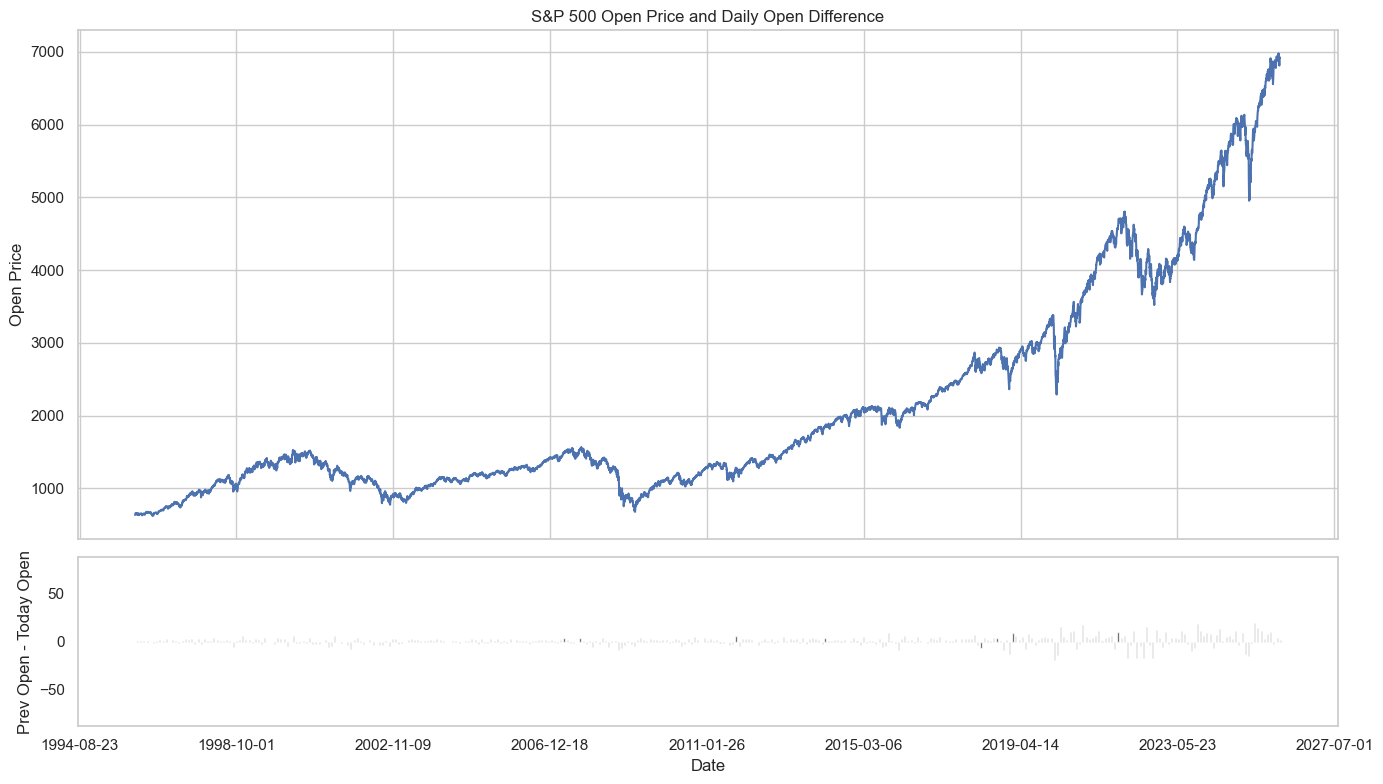

In [83]:
# Seaborn style
sns.set_theme(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(14, 8),
    sharex=True,
    gridspec_kw={"height_ratios": [3, 1]}
)

# --- Top: Open price line chart
sns.lineplot(
    data=sp500,
    x="Date",
    y="Open",
    ax=ax1
)
ax1.set_title("S&P 500 Open Price and Daily Open Difference")
ax1.set_ylabel("Open Price")

# --- Bottom: PrevOpen_minus_TodayOpen bar chart
ylimit = max(abs(weekly_sp500['Open_diff'].max()), abs(weekly_sp500['Open_diff'].min()))

ax2.grid(False)
ax2.set_ylim(-ylimit, ylimit)

ax2.bar(
    monthly_sp500["Date"],
    monthly_sp500["Open_diff"],
    width=10,          # adjust if dates overlap
    alpha=0.8,
    color="black"
)
ax2.set_ylabel("Prev Open - Today Open")
ax2.set_xlabel("Date")

# Reduce x-axis clutter (important for 30y of data)
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.tight_layout()
plt.show()

In [87]:
values = sp500["Open_diff"].dropna()

# Define bin width
bin_width = 5

# Compute bin edges
min_val = np.floor(values.min() / bin_width) * bin_width
max_val = np.ceil(values.max() / bin_width) * bin_width

bins = np.arange(min_val, max_val + bin_width, bin_width)

In [88]:
from scipy.stats import gaussian_kde, iqr

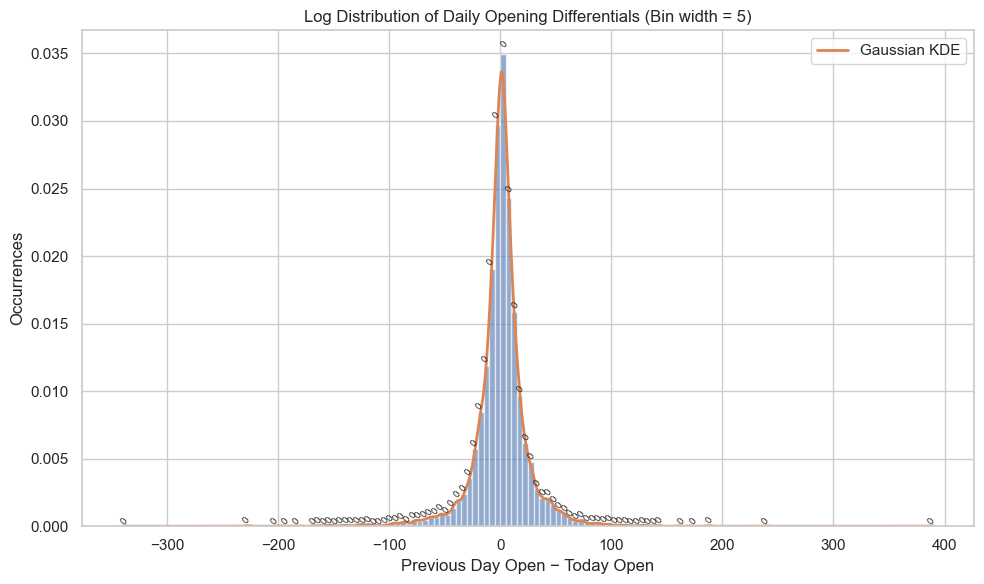

In [89]:
# Plot histogram and capture outputs
fig, ax = plt.subplots(figsize=(10, 6))
counts, bin_edges, patches = ax.hist(values, bins=bins, density=True, alpha = 0.6) # Density makes it a probibailistic model

x_offset = 0.0
y_offset_factor = 1.01


# Annotate counts above bars
for count, patch in zip(counts, patches):
    if count > 0:  # avoid log(0) issues
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        
        # Shift left/right based on sign of bin center
        bin_center = x
        if bin_center < 0:
            x_adj = x - patch.get_width() * 0.2  # shift left
        else:
            x_adj = x + patch.get_width() * 0.2   # shift right

        # Shift upward slightly
        y_adj = y * y_offset_factor

        ax.text(
            x_adj,
            y_adj,
            f"{int(count)}",
            ha="center",
            va="bottom",
            fontsize=7,
            rotation = 50
        )


values = np.asarray(values)
n = len(values)

# Silverman's univariate rule of thumb
sigma = np.std(values, ddof=1)
iqr_val = iqr(values)
sigma_hat = min(sigma, (iqr_val / 1.34))

h = 1.06 * sigma_hat * n ** (-1 / 5)

# Convert bandwidth to gaussian_kde scaling factor
bw_factor = h / np.std(values, ddof=1)

kde = gaussian_kde(values, bw_method=bw_factor)


# x range for smooth curve
x = np.linspace(min_val, max_val, 500)

# Scale KDE to match histogram counts, uncomment when you take off density in ax.hist
kde_counts = kde(x) * len(values) * bin_width

# Plot KDE
ax.plot(
    x,
    kde(x),
    linewidth=2,
    label="Gaussian KDE"
)

ax.legend()

#plt.yscale("log")
plt.xlabel("Previous Day Open − Today Open")
plt.ylabel("Occurrences")
plt.title("Log Distribution of Daily Opening Differentials (Bin width = 5)")

plt.tight_layout()
plt.show()

In [21]:
subsamples = kde.resample(100)

In [49]:
subsamples

array([[ 5.32293827e+00, -3.46884433e+00,  6.51522953e+00,
         4.02665869e+00,  3.62306148e+01, -1.14537380e+01,
         2.00431271e+00,  4.50309435e+01,  1.54667131e+01,
         4.18772860e+01, -1.23157215e+01,  6.97566659e+00,
         3.59190324e+00,  4.52124027e+00,  1.13760659e+00,
        -3.01806808e+00, -1.60512240e+01, -1.07175182e+01,
        -1.51319871e+00, -1.24510274e+01, -7.29004044e+01,
         1.43411682e+01,  2.40449733e+01, -7.14104889e+00,
         2.90068772e-01, -1.58322390e+01, -2.19341829e+00,
         1.17986151e+01, -4.08894879e+00,  9.30776770e+00,
        -3.30016361e+01, -4.68997978e+00, -1.97270630e+01,
        -3.81478507e+00,  1.59567235e+01, -8.44453146e+00,
        -2.30559065e+00,  2.25596261e+01, -2.22799402e+01,
        -6.99947473e+00,  7.11775133e+00, -9.99704614e+00,
         2.34662739e+01,  4.21722526e+00,  3.62232761e+00,
        -9.07489511e+00,  2.46511881e+01,  5.51261882e+00,
        -8.74850127e+00,  1.93207026e+00, -1.61326588e+0

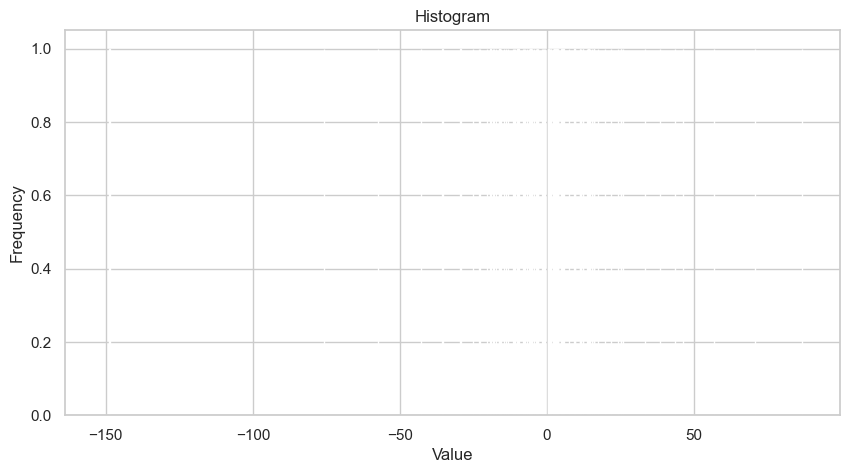

In [52]:
bins = np.arange(subsamples.min(), subsamples.max() + bin_width, bin_width)
plt.figure(figsize=(10, 5))
plt.hist(subsamples, bins=bins, rwidth=0.9, density=False)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()